# Predicting Yearly Compensation Bucket Using Multi-Class Ordinal Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('clean_kaggle_data_2022.csv', encoding = 'unicode_escape')

In [ ]:
pd.options.display.max_columns = None
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What is the highest level of formal education ...,Have you ever published any academic research ...,Did your research make use of machine learning...,Did your research make use of machine learning...,Did your research make use of machine learning...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use 

In [ ]:
new_df = df.iloc[1:]
new_df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Other,NaN,"Online courses (Coursera, EdX, etc)",NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,Vim / Emacs,NaN,Jupyter Notebook,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deepnote Notebooks,NaN,NaN,NaN,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years,Scikit-learn,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huggingface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"Word embeddings/vectors (GLoVe, fastText, word...","Encoder-decoder models (seq2seq, vanilla trans...",NaN,"Transformer language models (GPT-3, BERT, XLne...",NaN,NaN,NaN,NaN,Huggingface Models,NaN,NaN,ONNX models,NaN,NaN,NaN,Other storage services (i.e. google drive),Huggingface Models,Data Scientist,Online Service/Internet-based Services,0-49 employees,2-Jan,"We recently started using ML methods (i.e., mo...",NaN,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN,NaN,NaN,"25,000-29,999","$1000-$9,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,ONNX Runtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weights & Biases,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,GPUs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-5 times,Twitter (data science influencers),NaN,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Sc

## Data Cleaning

Some basic exploration to understand the data better.

In [ ]:
print(new_df.dtypes)

Duration (in seconds)     object
Q2                        object
Q3                        object
Q4                        object
Q5                        object
                          ...   
Q44_10                    object
Q44_11                    object
Q44_12                    object
Q29_Encoded              float64
Q29_buckets               object
Length: 298, dtype: object


In [ ]:
#checking all the unique values
new_df['Q29'].unique().tolist()

['25,000-29,999',
 '100,000-124,999',
 '200,000-249,999',
 '150,000-199,999',
 '90,000-99,999',
 '30,000-39,999',
 '3,000-3,999',
 '50,000-59,999',
 '125,000-149,999',
 '15,000-19,999',
 '5,000-7,499',
 '10,000-14,999',
 '20,000-24,999',
 '$0-999',
 '7,500-9,999',
 '4,000-4,999',
 '80,000-89,999',
 '2,000-2,999',
 '250,000-299,999',
 '1,000-1,999',
 '$500,000-999,999',
 '70,000-79,999',
 '60,000-69,999',
 '40,000-49,999',
 '>$1,000,000',
 '300,000-499,999']

In [ ]:
#checking for null values
new_df['Q29'].isna().values.any()

False

In [ ]:
new_df['Q29_buckets'].unique().tolist()

['20,000-29,999',
 '100,000-124,999',
 '200,000-299,999',
 '150,000-199,999',
 '90,000-99,999',
 '30,000-39,999',
 '0-9,999',
 '50,000-59,999',
 '125,000-149,999',
 '10,000-19,999',
 '80,000-89,999',
 '>300,000',
 '70,000-79,999',
 '60,000-69,999',
 '40,000-49,999']

In [ ]:
new_df.shape

(8136, 298)

In [ ]:
#checking the number of null values in each column
null_vals = new_df.isna().sum().to_frame().T
null_vals

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,0,0,0,0,0,4374,7018,5756,6679,7663,7194,5779,7104,7392,6225,7331,6244,6070,3010,7023,3870,3621,7862,7342,0,2941,7452,6845,7101,0,1615,6397,4277,7203,7551,7010,7053,6912,7219,7684,7389,8010,7995,8016,7482,6177,6677,6688,4791,6127,7080,6500,7358,7384,7504,3166,7576,7977,7622,5354,4868,7752,8091,7822,7717,7862,8027,7783,8114,8061,7794,8039,8044,5760,7926,2895,4023,5860,6425,7611,7792,7993,7751,7729,7864,8039,8060,8054,7041,7896,684,3399,5066,5527,5963,7846,5917,7050,7545,7705,7863,8051,7698,7412,7634,7882,3473,4154,5406,6578,7777,6682,5703,7678,6731,7053,7545,7610,7740,7950,7105,7111,7033,6575,7589,7794,7440,8071,7032,7371,7835,7037,7684,8088,6827,7265,7134,7906,8061,7930,7874,6189,5097,7890,6522,0,0,0,0,0,3419,5649,5248,6068,5907,6564,6771,7704,0,50,5884,6782,6150,7855,7913,8031,7983,8061,8082,8089,7019,7931,6275,6578,7283,6854,7249,8072,7545,7646,6575,7703,6887,7663,7401,8066,5985,6671,7027,7475,7140,7749,7952,6985,7637,7768,7649,7793,7472,7716,7222,7927,7918,6542,7513,7979,6462,7945,8093,8057,8006,8099,8037,7976,8114,6173,7950,7595,7755,7795,8016,7701,8034,8037,8027,8107,8085,8027,5245,8022,7685,8019,7950,8013,7882,7822,4748,8017,7629,7979,7930,8070,8046,8077,8086,8076,8091,7535,4951,8015,8010,7764,8081,7314,8101,8067,7496,8114,8085,8097,8104,8073,7999,5327,8015,7855,7938,8008,7955,8058,8069,8100,4373,8047,5555,7502,8073,8080,8110,8097,8078,6440,8068,3723,6353,6462,6944,3485,6466,3533,7117,4513,6296,7370,7731,7820,0,0


It is clear that there are several missing values in many of the columns.

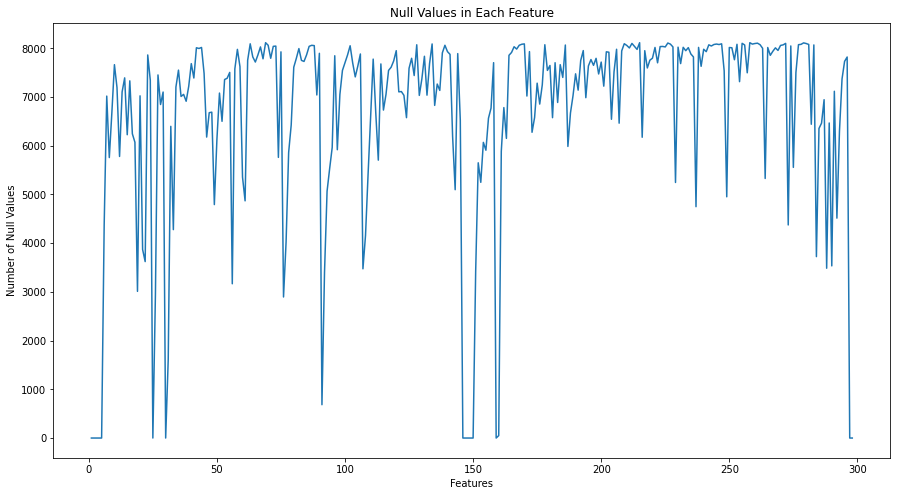

In [ ]:
#visualizing the number of missing values with a line plot

plt.figure(figsize=(15, 8))
plt.plot(range(1,299),null_vals.iloc[0])
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Each Feature')
plt.show()

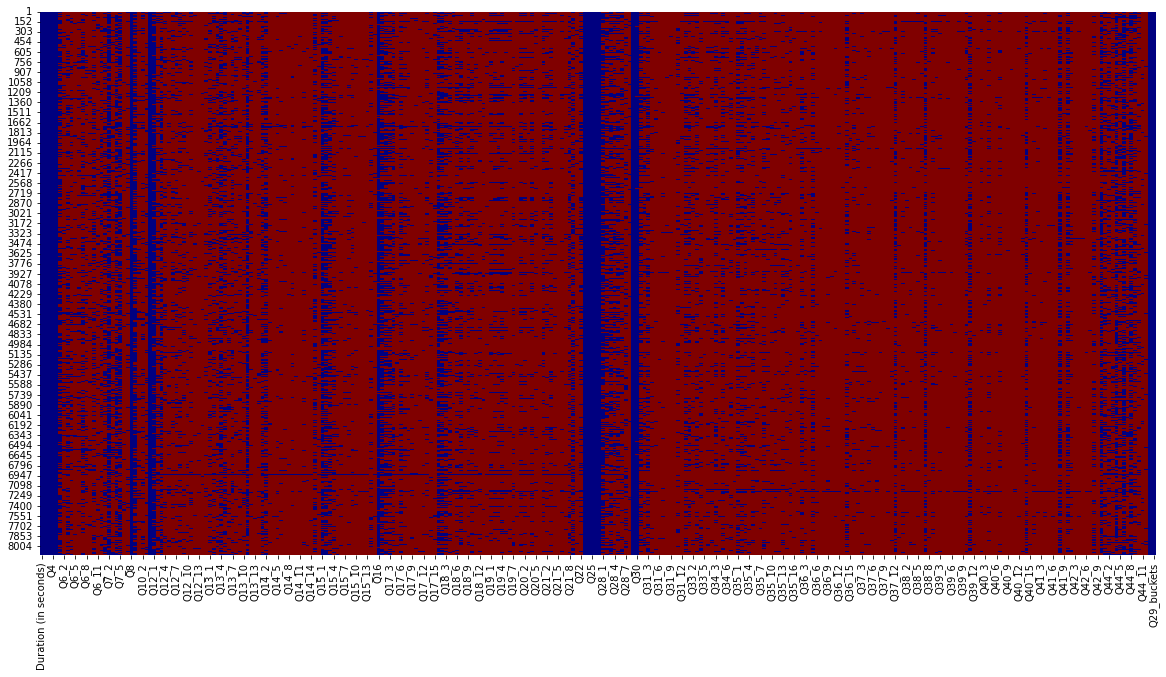

In [ ]:
#plotting the heatmap to see how the null values are distributed

plt.figure(figsize=(20, 10))
sns.heatmap(new_df.isnull(), cmap='jet', cbar = False)
plt.show()

In this dataset, there are two types of questions - single and multi-choice questions.
Filtering these two types and handling them separately would be easier.

In [ ]:
#filtering

columns = new_df.columns

single = {}
multi = {}

for i in range(2,45):
  ele = 'Q' + str(i) + '_'
  ele_new = ele.replace('_','')
  multi_cols = []
  multi_cols = [col for col in columns if ele in col] #adding all the columns with a specific question number to the list
  if len(multi_cols) > 1:
    multi[ele_new] = [j for j in columns if ele in j]   #if number of columns with same question number is greater than 1, it is multi choice
  else:
    single[ele_new] = [j for j in columns if ele in j]  #else single choice

Handling the single-choice questions first.

In [ ]:
#checking the number of null values in each column
new_df[list(single.keys())].isna().sum()

Q2        0
Q3        0
Q4        0
Q5        0
Q8        0
Q9     2941
Q11       0
Q16     684
Q22    6522
Q23       0
Q24       0
Q25       0
Q26       0
Q27       0
Q30      50
Q32    6275
Q43    3723
dtype: int64

**Q22** and **Q32** have a lot of null values and Q32 is dependent on Q31 (which has very low response numbers). Hence, these two can be dropped. 

In [ ]:
new_df.drop(['Q22', 'Q32'], axis = 1, inplace = True)
single.pop('Q22')
single.pop('Q32')

[]

For **Q9**, since there are much lesser null values, it is important to analyze a bit more.

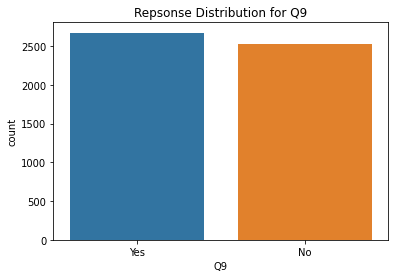

In [ ]:
sns.countplot(x=new_df['Q9'])
plt.title('Repsonse Distribution for Q9')
plt.show()

In [ ]:
#getting values count for Q9 as the graph isn't telling much
new_df.Q9.value_counts()

Yes    2672
No     2523
Name: Q9, dtype: int64

In [ ]:
#as Q9 is dependent on Q8, getting Q8 value count
new_df.Q8.value_counts()

MasterEEs degree                                                      3567
BachelorEEs degree                                                    2005
Doctoral degree                                                          1349
I prefer not to answer                                                    426
Some college/university study without earning a bachelorEEs degree     304
Professional doctorate                                                    279
No formal education past high school                                      206
Name: Q8, dtype: int64

Around 5000 people were eligible to answer Q9 and all of them did answer it. However the response distribution is somewhat equally distributed. This makes it harder to choose the best option to replace the missing values with. Also, as per my intution, publishing research papers might not have a significant imapct on the salary. Hence, the column can be dropped.

In [ ]:
new_df.drop(['Q9'], axis = 1, inplace = True)
single.pop('Q9')

[]

Analyzing **Q16**

In [ ]:
#getting value counts
new_df.Q16.value_counts()

Under 1 year                             1724
1-2 years                                1266
I do not use machine learning methods    1107
2-3 years                                 955
5-10 years                                808
4-5 years                                 635
3-4 years                                 591
10-20 years                               366
Name: Q16, dtype: int64

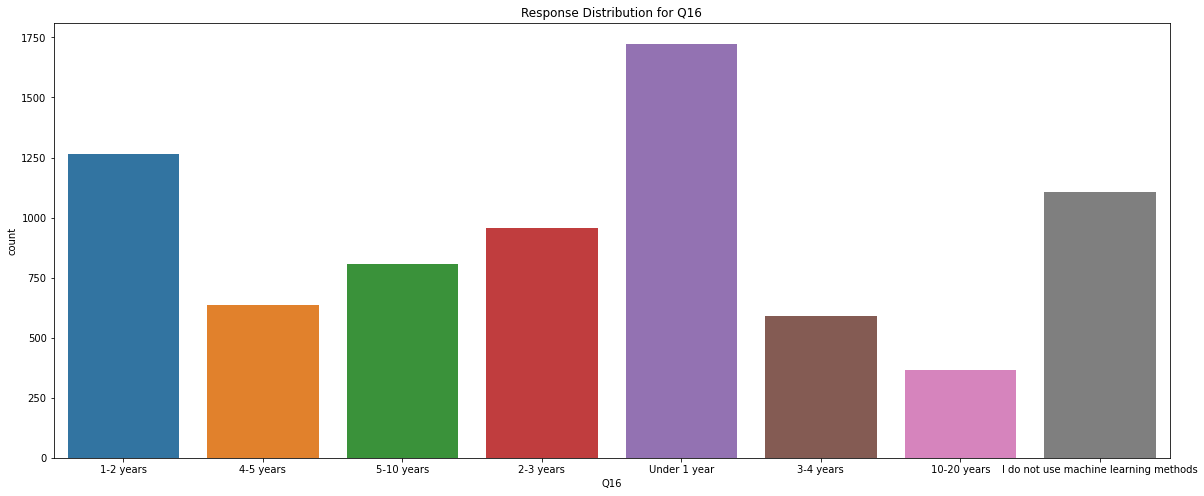

In [ ]:
#plot to check response distribution
plt.figure(figsize = (20,8))
sns.countplot(x=new_df['Q16'])
plt.title('Response Distribution for Q16')
plt.show()

In [ ]:
#replacing null values with mode
new_df['Q16'].fillna(new_df['Q16'].mode()[0], inplace = True)

Similarly, analyzing **Q30** and **Q43**.

In [ ]:
new_df.Q30.value_counts()

$0 ($USD)                  2653
$100-$999                  1993
$1000-$9,999               1412
$1-$99                     1401
$10,000-$99,999             453
$100,000 or more ($USD)     174
Name: Q30, dtype: int64

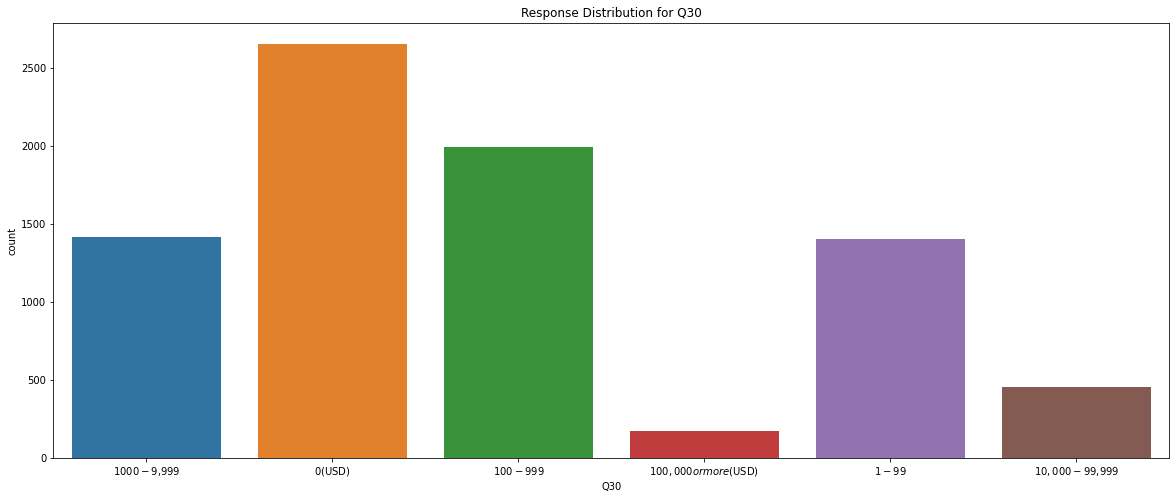

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x=new_df['Q30'])
plt.title('Response Distribution for Q30')
plt.show()

In [ ]:
new_df['Q30'].fillna(new_df['Q30'].mode()[0], inplace = True)

In [ ]:
new_df.Q43.value_counts()

Never                 2429
2-5 times              922
Once                   586
6-25 times             255
More than 25 times     221
Name: Q43, dtype: int64

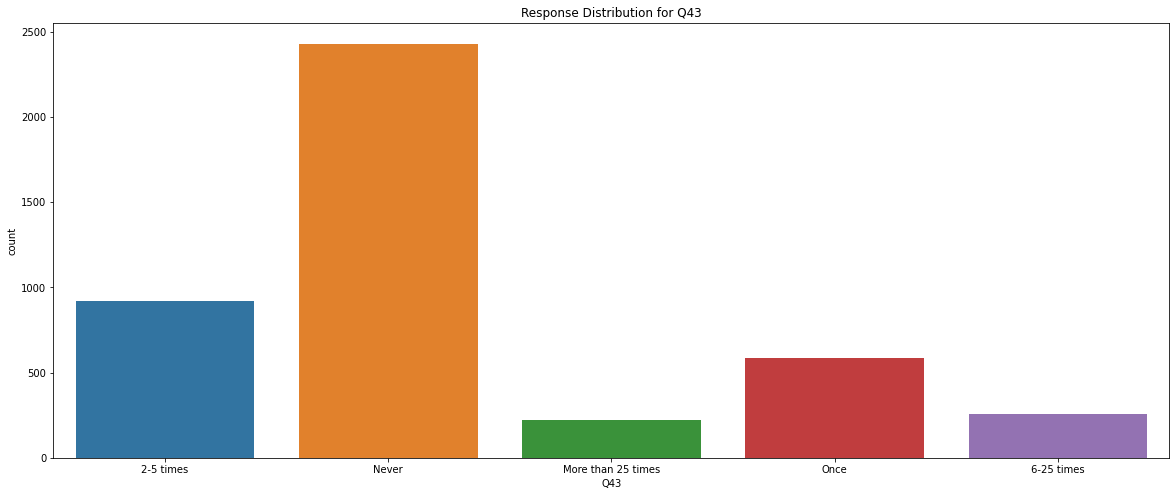

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x=new_df['Q43'])
plt.title('Response Distribution for Q43')
plt.show()

In [ ]:
new_df['Q43'].fillna(new_df['Q43'].mode()[0], inplace = True)

Upon some analysis, it can be seen that some values for **Q8** and **Q26** are not quite right.
So, a dictionary with the right data is created and the original values are replaced with the mapped values.

In [ ]:
new_df['Q8'].unique()

array(['Some college/university study without earning a bachelor\x81E\x80\x81Es degree',
       'Bachelor\x81E\x80\x81Es degree', 'Doctoral degree',
       'Master\x81E\x80\x81Es degree', 'I prefer not to answer',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

In [ ]:
new_df['Q26'].unique()

array(['2-Jan', '20+', '4-Mar', '9-May', '0', '14-Oct', '15-19'],
      dtype=object)

In [ ]:
#creating dictionaries for mapping

Q8_dict = {
    'Some college/university study without earning a bachelorEEs degree': 'Some college/university study without earning a bachelor’s degree',
    'BachelorEEs degree': 'Bachelor’s degree',
    'Doctoral degree': 'Doctoral degree',
    'MasterEEs degree':'Master’s degree',
    'I prefer not to answer': 'I prefer not to answer',
    'No formal education past high school': 'No formal education past high school',
    'Professional doctorate': 'Professional doctorate'
    } 

Q26_dict = {
    '0': '0',
    '2-Jan': '1-2',
    '4-Mar': '3-4',
    '9-May': '5-9',
    '14-Oct': '10-14',
    '15-19': '15-19',
    '20+': '20+'
}

In [ ]:
#replacing with corrected values

new_df = new_df.replace({'Q8': Q8_dict})
new_df = new_df.replace({'Q26': Q26_dict})

In [ ]:
# new_df.shape

In [ ]:
single_clean_df = new_df.copy()

In [ ]:
#checking if all null values from single choice questions have been removed
new_df[list(single.keys())].isna().sum()

Q2     0
Q3     0
Q4     0
Q5     0
Q8     0
Q11    0
Q16    0
Q23    0
Q24    0
Q25    0
Q26    0
Q27    0
Q30    0
Q43    0
dtype: int64

Now, the target and the labels are assigned to variables. Also, other unecessary features or already encoded features are removed. 

In [ ]:
target = new_df.Q29_Encoded.astype(int)
target_labels = new_df['Q29_buckets']

In [ ]:
#removing columns 'Q29_Encoded' and 'Q29_buckets' 
new_df = new_df.iloc[:,:-2]

In [ ]:
#dropping columns 'Duration', 'Q29' and all columns with 'Other' as it is not needed

new_df.drop(columns = ['Q29', 'Duration (in seconds)'], inplace = True)
new_df.drop(list(new_df.filter(regex = 'OTHER')), axis = 1, inplace = True)

Now, null values in the multi-choice questions are imputed.

In [ ]:
#creating a seperate data frame without single-choice questions
multi_df = new_df.drop(list(single.keys()), axis = 1)

In [ ]:
#checking the number of null values in multi-choice columns
for i in multi_df.columns:
  print(i,'\t',multi_df[i].isna().sum())

Q6_1 	 4374
Q6_2 	 7018
Q6_3 	 5756
Q6_4 	 6679
Q6_5 	 7663
Q6_6 	 7194
Q6_7 	 5779
Q6_8 	 7104
Q6_9 	 7392
Q6_10 	 6225
Q6_11 	 7331
Q6_12 	 6244
Q7_1 	 6070
Q7_2 	 3010
Q7_3 	 7023
Q7_4 	 3870
Q7_5 	 3621
Q7_6 	 7862
Q7_7 	 7342
Q10_1 	 7452
Q10_2 	 6845
Q10_3 	 7101
Q12_1 	 1615
Q12_2 	 6397
Q12_3 	 4277
Q12_4 	 7203
Q12_5 	 7551
Q12_6 	 7010
Q12_7 	 7053
Q12_8 	 6912
Q12_9 	 7219
Q12_10 	 7684
Q12_11 	 7389
Q12_12 	 8010
Q12_13 	 7995
Q12_14 	 8016
Q12_15 	 7482
Q13_1 	 6177
Q13_2 	 6677
Q13_3 	 6688
Q13_4 	 4791
Q13_5 	 6127
Q13_6 	 7080
Q13_7 	 6500
Q13_8 	 7358
Q13_9 	 7384
Q13_10 	 7504
Q13_11 	 3166
Q13_12 	 7576
Q13_13 	 7977
Q13_14 	 7622
Q14_1 	 5354
Q14_2 	 4868
Q14_3 	 7752
Q14_4 	 8091
Q14_5 	 7822
Q14_6 	 7717
Q14_7 	 7862
Q14_8 	 8027
Q14_9 	 7783
Q14_10 	 8114
Q14_11 	 8061
Q14_12 	 7794
Q14_13 	 8039
Q14_14 	 8044
Q14_15 	 5760
Q14_16 	 7926
Q15_1 	 2895
Q15_2 	 4023
Q15_3 	 5860
Q15_4 	 6425
Q15_5 	 7611
Q15_6 	 7792
Q15_7 	 7993
Q15_8 	 7751
Q15_9 	 7729
Q15_10 	 7

Firstly, for all multi choice questions, the null values are replaced with 'Other' as some questions may not have been displayed to a participant. Or they must have chosen a different option for that question.

In [ ]:
for j in multi_df.columns:
    if new_df[j].nunique() == 1:
        new_df.loc[new_df[j].isnull(), j] = 'Other'

In [ ]:
#checking for null values
new_df.isna().sum().sum()

0

In [ ]:
clean_df = new_df.copy()

Now, the data can be encoded.

In [ ]:
#checking data type

for el in new_df.columns:
  print(el, new_df[el].dtypes)

Q2 object
Q3 object
Q4 object
Q5 object
Q6_1 object
Q6_2 object
Q6_3 object
Q6_4 object
Q6_5 object
Q6_6 object
Q6_7 object
Q6_8 object
Q6_9 object
Q6_10 object
Q6_11 object
Q6_12 object
Q7_1 object
Q7_2 object
Q7_3 object
Q7_4 object
Q7_5 object
Q7_6 object
Q7_7 object
Q8 object
Q10_1 object
Q10_2 object
Q10_3 object
Q11 object
Q12_1 object
Q12_2 object
Q12_3 object
Q12_4 object
Q12_5 object
Q12_6 object
Q12_7 object
Q12_8 object
Q12_9 object
Q12_10 object
Q12_11 object
Q12_12 object
Q12_13 object
Q12_14 object
Q12_15 object
Q13_1 object
Q13_2 object
Q13_3 object
Q13_4 object
Q13_5 object
Q13_6 object
Q13_7 object
Q13_8 object
Q13_9 object
Q13_10 object
Q13_11 object
Q13_12 object
Q13_13 object
Q13_14 object
Q14_1 object
Q14_2 object
Q14_3 object
Q14_4 object
Q14_5 object
Q14_6 object
Q14_7 object
Q14_8 object
Q14_9 object
Q14_10 object
Q14_11 object
Q14_12 object
Q14_13 object
Q14_14 object
Q14_15 object
Q14_16 object
Q15_1 object
Q15_2 object
Q15_3 object
Q15_4 object
Q15_5 object
Q

Label encoding is used as it can convert non-numerical data to numerical data type.

In [ ]:
#encoding
le = preprocessing.LabelEncoder()
for k in new_df.columns:
  if new_df[k].dtype == 'object':
    new_df[k] = le.fit_transform(new_df[k])

In [ ]:
new_df.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,8,0,15,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,6,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,4,11,0,1,4,1,1,0,0,0,1,1,0,5,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0
2,3,0,16,0,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,0,1,1,1,1,1,0,4,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,0,11,6,3,4,3,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,3,1,0,1,1,1,1,0,0,1,0,1,0
3,10,0,2,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,2,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,5,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,10,5,2,4,4,1,1,0,1,1,1,1,0,4,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,3,0,0,0,1,1,0,1,1,1,0,1,0
4,5,0,55,0,0,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,5,0,0,0,0,1,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,5,3,2,4,3,1,1,0,1,1,1,1,0,4,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1

In [ ]:
encoded_df = new_df.copy()

## EDA and Feature Selection

In [ ]:
analysis_df = clean_df.copy()
analysis_df['Q29_Encoded'] = target.values
analysis_df['Q29_buckets'] = target_labels.values

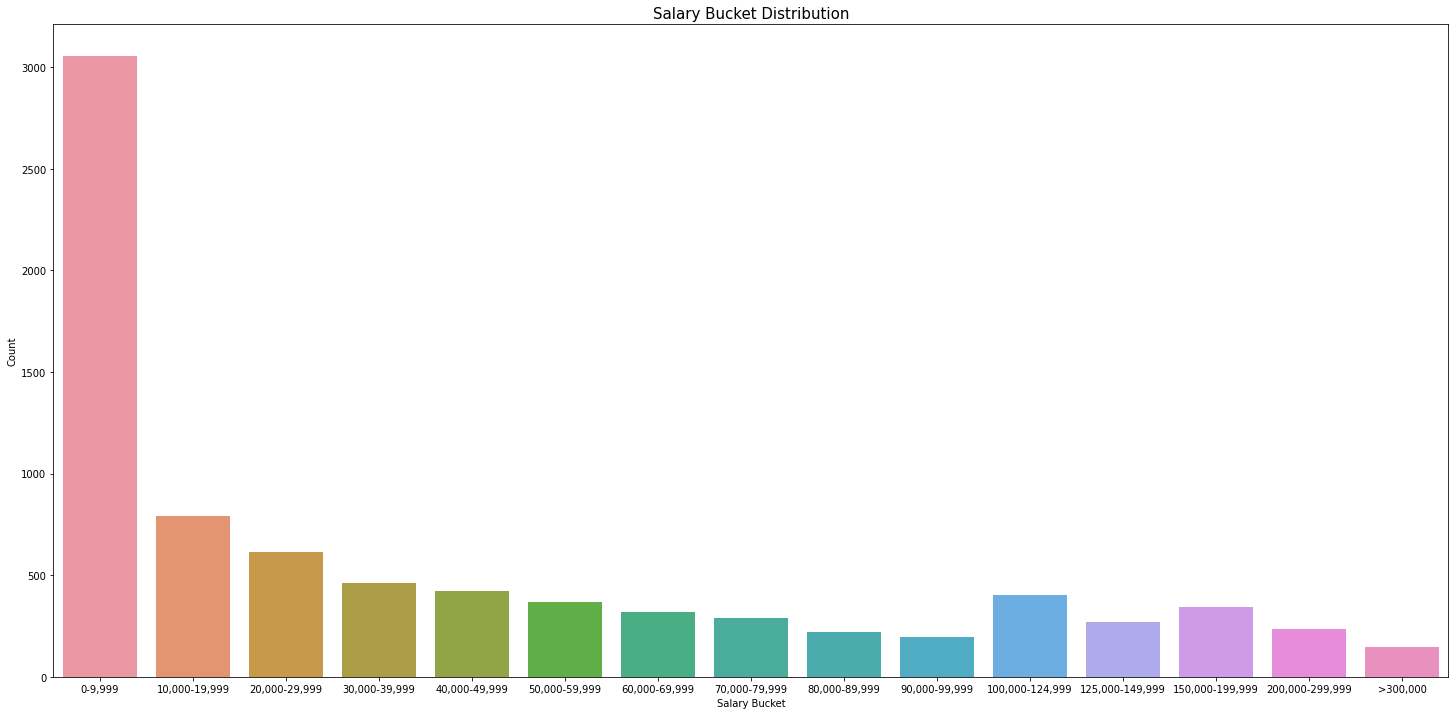

In [ ]:
#checking how the salary is distributed

plt.figure(figsize=(25,12))
sns.countplot(x='Q29_buckets', data=analysis_df, order = ['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999','200,000-299,999','>300,000'])
plt.title('Salary Bucket Distribution',fontsize = 15)
plt.xlabel('Salary Bucket')
plt.ylabel('Count')
plt.show()

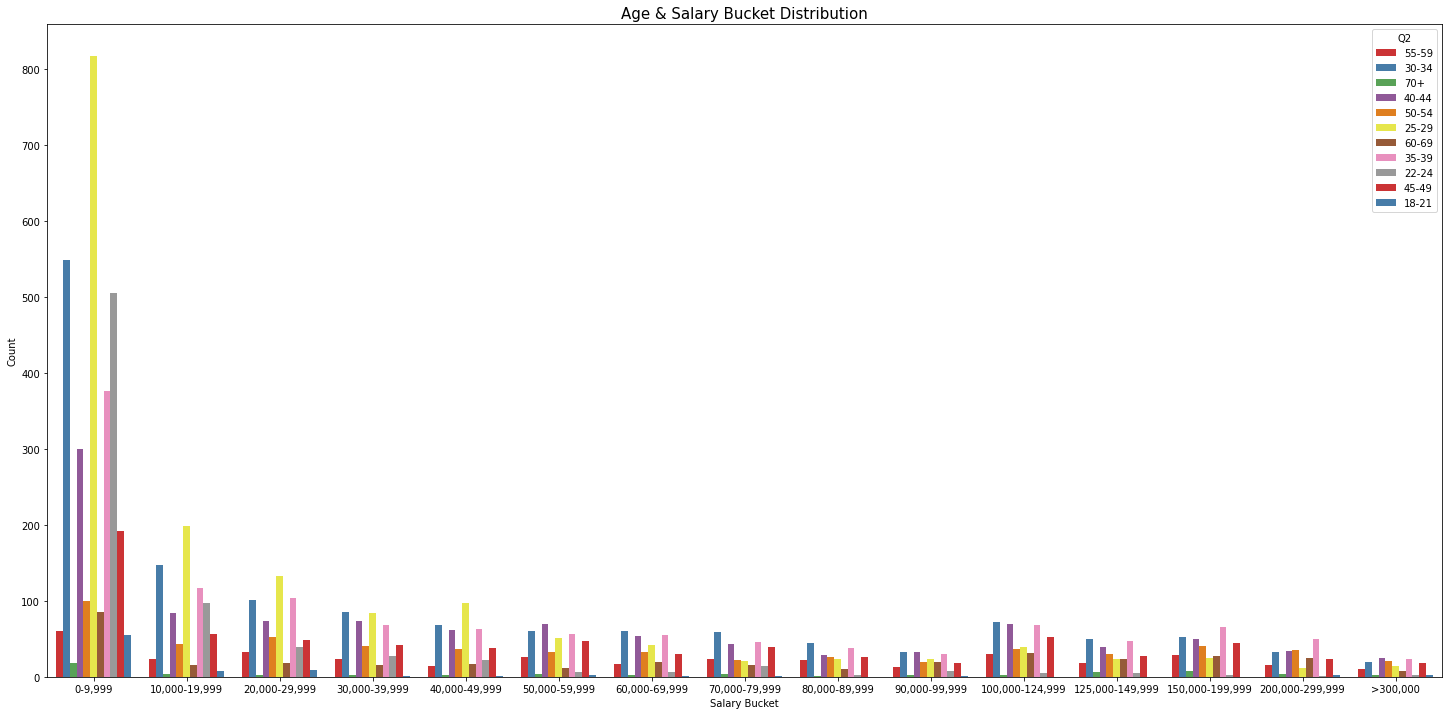

In [ ]:
#checking how salary and age are related

plt.figure(figsize=(25,12))
# sns.countplot(x = 'Q29_buckets', hue = 'Q2', data = new_df, order = ['18-21', '22-24', '25-29', '30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'])
sns.countplot(x = 'Q29_buckets', hue = 'Q2', data = analysis_df, order = ['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999','200,000-299,999','>300,000'], palette = 'Set1')
plt.title('Age & Salary Bucket Distribution',fontsize=15)
plt.xlabel('Salary Bucket')
plt.ylabel('Count')
plt.show()

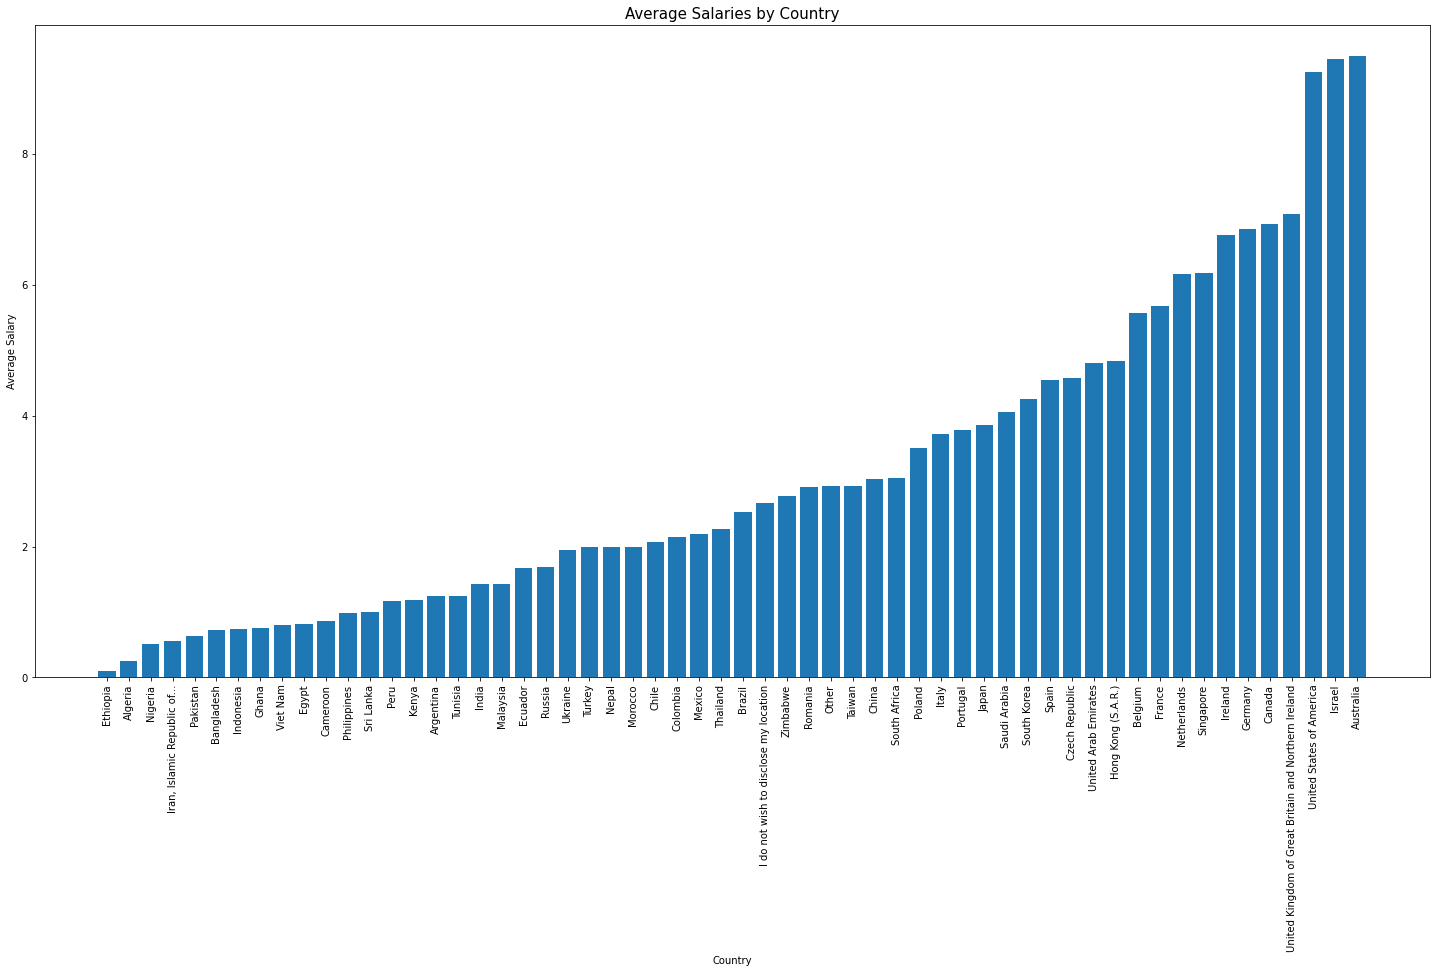

In [ ]:
salary_group = pd.DataFrame(analysis_df.groupby('Q4')['Q29_Encoded'].mean().to_frame(name='avg_salary').reset_index().sort_values('avg_salary'))
plt.figure(figsize=(25,12))
plt.bar(salary_group['Q4'].values, salary_group['avg_salary'].values)
plt.title('Average Salaries by Country', fontsize = 15)
plt.xlabel('Country') 
plt.ylabel('Average Salary') 
plt.xticks(salary_group['Q4'].values,rotation=90)
plt.show()

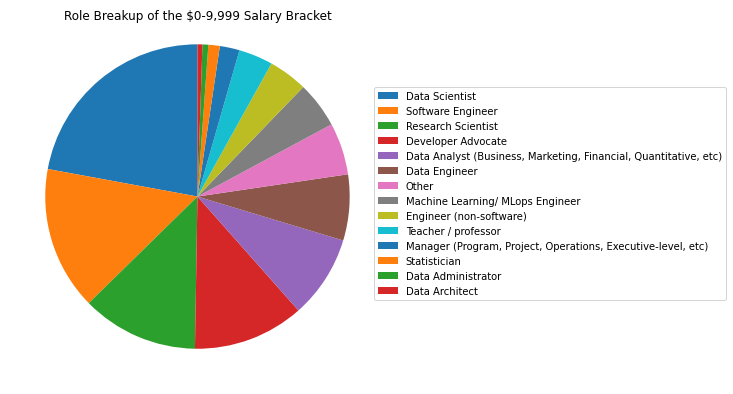

In [ ]:
#checking the role breakup of the lowest income bracket

plt.figure(figsize=(9,7))
labels = analysis_df['Q23'].unique()
ax = plt.pie(analysis_df[analysis_df['Q29_Encoded'] == 0]['Q23'].value_counts(normalize = True), startangle=90)
# ax2 = plt.pie(analysis_df['Q23'].value_counts(normalize = True), startangle=90)
plt.legend(labels, bbox_to_anchor=(0.95, 0.8))
plt.title('Role Breakup of the $0-9,999 Salary Bracket', x = 0.5, y = 0.95)
plt.show()

Next, some feature engineering can be done to improve the data.

In [ ]:
viz_df = encoded_df.copy()
viz_df['salary_en'] =  target.values
viz_df['salary_buckets'] = target_labels.values

Using a heatmap to see the correlation between each of the features.

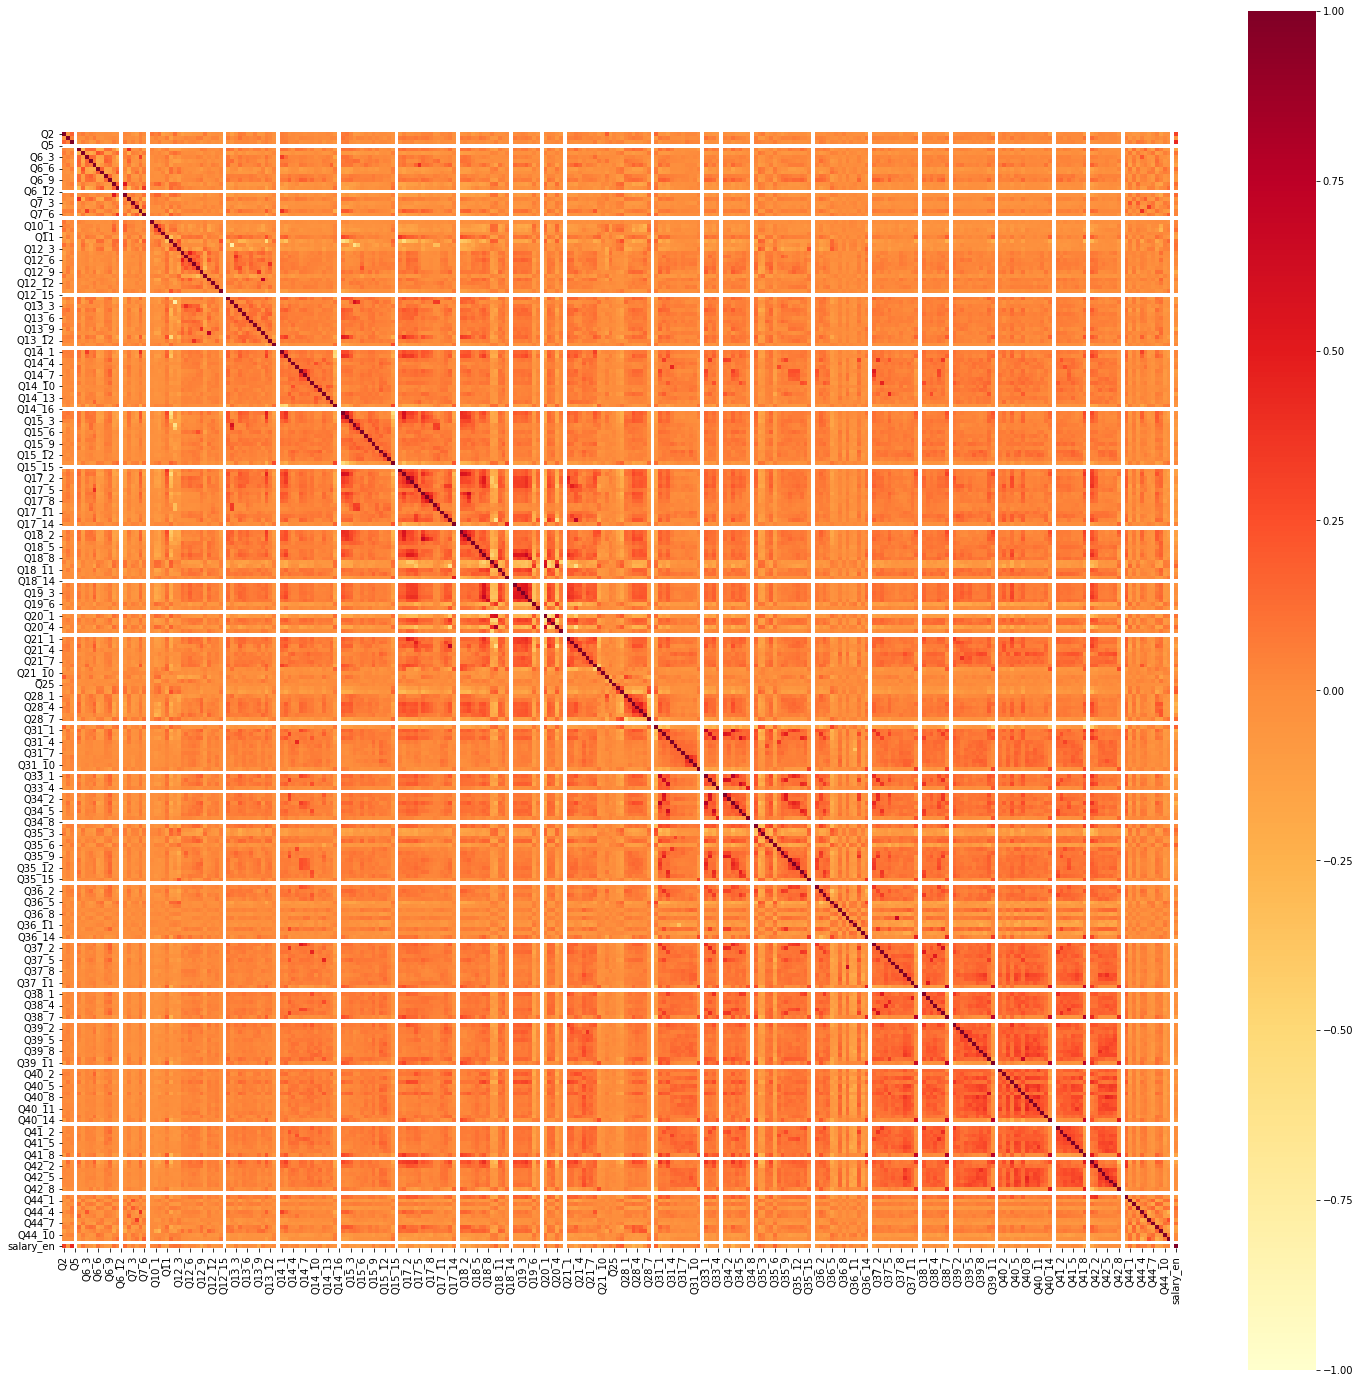

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(25,25))
salary_corr_hm = viz_df.corr()
sns.heatmap(salary_corr_hm, vmin=-1, vmax=1, center=0, cmap="YlOrRd", ax = ax, square=True)
plt.show()

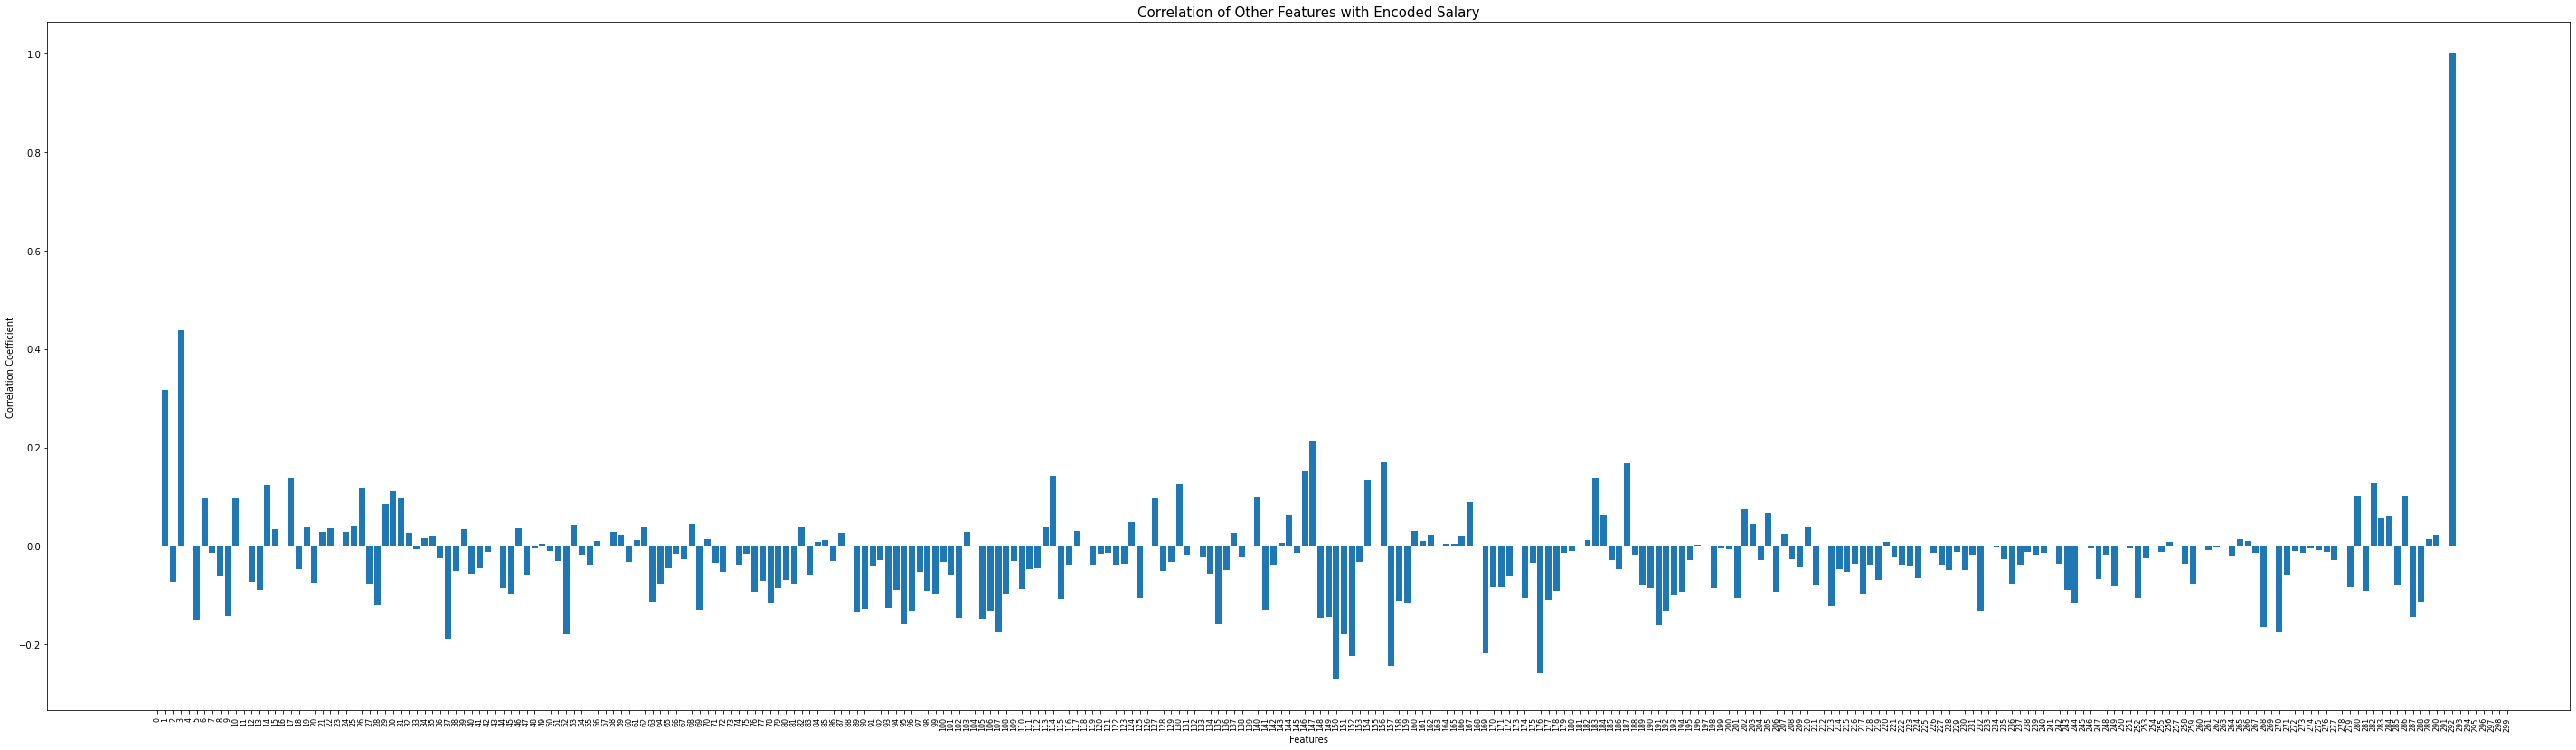

In [ ]:
#checking the correlation of features
salary_corr = viz_df.corrwith(viz_df['salary_en'])
plt.figure(figsize = (50,14))
plt.bar(np.arange(1,len(salary_corr) + 1), salary_corr)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(np.arange(0,300,1),rotation = 'vertical', fontsize = 8)
plt.title('Correlation of Other Features with Encoded Salary', fontsize = 15)
plt.show()

In [ ]:
#getting the numerical values of correlation coefficents

salary_corr = salary_corr.sort_values(ascending = False)
print(salary_corr.to_string())

salary_en    1.000000
Q4           0.437203
Q2           0.315812
Q27          0.213171
Q30          0.169158
Q35_6        0.168164
Q26          0.151562
Q18_10       0.142630
Q35_2        0.138318
Q7_1         0.138303
Q28_7        0.133732
Q44_3        0.126970
Q20_4        0.125639
Q6_10        0.124357
Q10_2        0.118151
Q12_2        0.111104
Q44_7        0.101601
Q44_1        0.101547
Q21_8        0.099971
Q12_3        0.098310
Q6_6         0.096425
Q6_2         0.096017
Q20_1        0.096004
Q31_11       0.088501
Q12_1        0.086176
Q36_5        0.073966
Q36_8        0.067301
Q35_3        0.063852
Q24          0.063056
Q44_5        0.060714
Q44_4        0.056640
Q19_6        0.048208
Q36_6        0.045044
Q14_11       0.044590
Q13_10       0.042444
Q10_1        0.040340
Q15_9        0.040192
Q18_9        0.039665
Q36_13       0.039263
Q7_3         0.038546
Q14_5        0.037762
Q13_3        0.036609
Q7_6         0.035251
Q6_11        0.034324
Q12_11       0.034113
Q31_4     

Removing all highly correlated fatures as it may affect the model performance.

In [ ]:
#checking which features have a correlation coefficient below 0

high_corr_feats = set()
for i in range(len(salary_corr_hm.columns)):
  for j in range(i):
    if abs(salary_corr_hm.iloc[i, j]) > 0.6:
      high_corr_feats.add(salary_corr_hm.columns[i])
print(high_corr_feats)

{'Q18_3', 'Q33_3', 'Q33_1', 'Q19_4', 'Q17_3', 'Q15_4', 'Q15_2', 'Q41_8', 'Q18_10', 'Q34_3', 'Q13_10', 'Q40_14', 'Q38_7', 'Q21_3', 'Q33_2', 'Q40_7', 'Q13_2', 'Q38_6', 'Q20_1', 'Q37_7', 'Q34_5', 'Q39_11', 'Q19_5', 'Q20_4'}


In [ ]:
viz_df.drop(columns = ['Q33_3', 'Q41_8', 'Q15_2', 'Q34_5', 'Q20_1', 'Q17_3', 'Q40_14', 'Q38_6', 'Q20_4', 'Q18_10', 'Q13_10', 'Q15_4', 'Q21_3', 'Q40_7', 'Q18_3', 'Q13_2', 'Q19_4', 'Q33_2', 'Q33_1', 'Q34_3', 'Q37_7', 'Q19_5', 'Q38_7', 'Q39_11'], inplace = True)

In [ ]:
viz_df

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_3,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_6,Q19_7,Q19_8,Q20_2,Q20_3,Q20_5,Q20_6,Q21_1,Q21_2,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q33_4,Q33_5,Q34_1,Q34_2,Q34_4,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,salary_en,salary_buckets
1,8,0,15,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,6,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,4,11,0,1,4,1,1,0,0,0,1,1,0,5,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,2,"20,000-29,999"
2,3,0,16,0,0,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,4,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,0,11,6,3,4,3,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,3,1,0,1,1,1,1,0,0,1,0,1,0,10,"100,000-124,999"
3,10,0,2,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,2,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,5,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0,10,5,2,4,4,1,1,0,1,1,1,1,0,4,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,3,0,0,0,1,1,0,1,1,1,0,1,0,10,"100,000-124,999"
4,5,0,55,0,0,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,5,0,0,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,5,3,2,4,3,1,1,0,1,1,1,1,0,4,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,13,"200,000-299,999"
5,5,0,55,0,0,0,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,0,3,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,

PCA

In [ ]:
viz_df = viz_df.drop(['salary_buckets'],axis = 1)

In [ ]:
#splitting the data into train and test set

y = viz_df['salary_en']
X = viz_df.drop(['salary_en'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
feat_names = X.columns

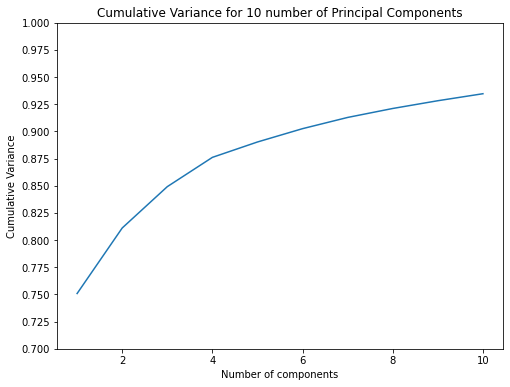

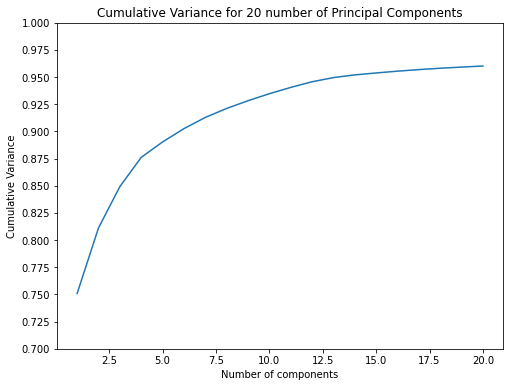

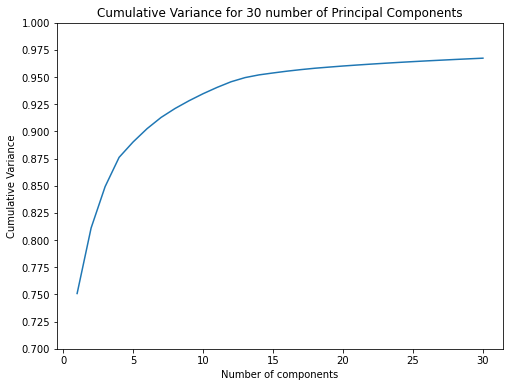

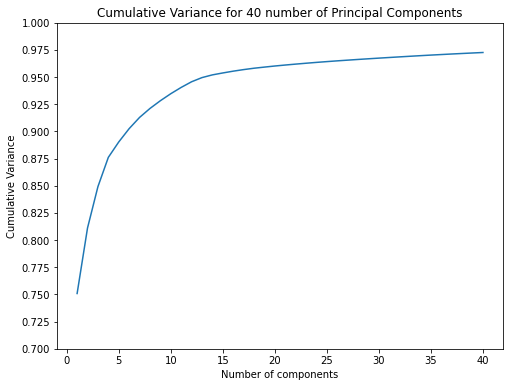

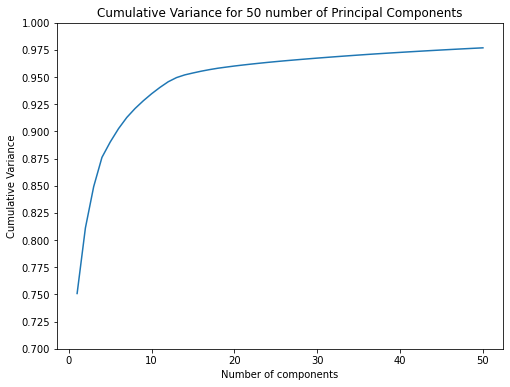

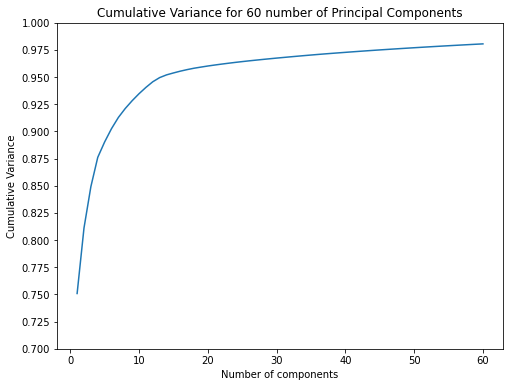

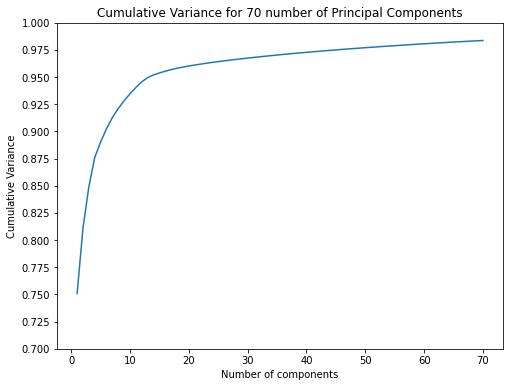

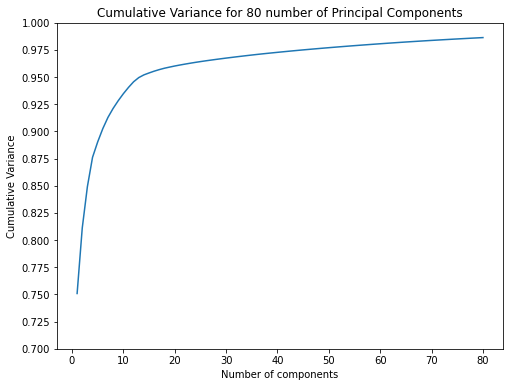

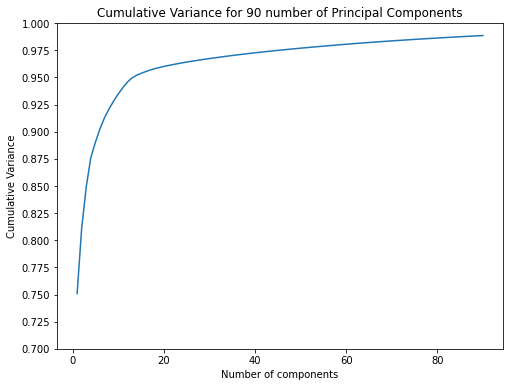

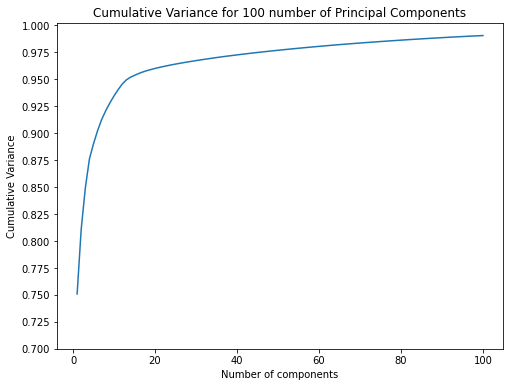

In [ ]:
#checking how the PCs explain the variance 

no_of_components = [num for num in range(10,101,10)]
for i in no_of_components:
  plt.figure(figsize = (8,6))
  pca = PCA(n_components=i)
  pca.fit(X_train)
  pca_X_train = pca.transform(X_train)
  pca_X_test = pca.transform(X_test)
  plt.plot(np.arange(1, i+1), np.cumsum(pca.explained_variance_ratio_))
  plt.xlabel("Number of components")
  plt.ylabel("Cumulative Variance")
  plt.yticks(np.arange(0.7,1,0.025))
  plt.title("Cumulative Variance for {} number of Principal Components".format(i))
  plt.show()
  print()


We can see that 90 PCs explain around 98% of the variance. Hence, we choose to reduce the number of features to 90.

In [ ]:
pca = PCA(n_components=90)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Model Implementation

In [ ]:
def train_model(X,y,model_used):
  print('***************** {} *****************'.format(model_used))
  print()
  kf = KFold(n_splits=10)
  train_acc = []
  max_accuracy = 0
  fold = 0
  var=[]
  max_acc = []
  mean_f1 = []
  std_f1 = []
  f1_vals = []


  for train_index, test_index in kf.split(X):
    fold += 1

    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    pred_train = np.zeros((len(X_train),14))
    y_new = y_train.copy()
    for i in range(14):
        y_new[y_train <=i] = 0
        y_new[y_train >i] = 1
        model = model_used
        model.fit(X_train,y_new)
        predictions_0 = model.predict_proba(X_train)[:,0]
        predictions_1 = model.predict_proba(X_train)[:,1]
        pred_train[:,i] = predictions_0

    pred_diff = np.diff(pred_train)
    pred_diff2 = np.append(pred_train[:,0].reshape(-1,1),pred_diff,axis=1)
    pred_values = np.append(pred_diff2,predictions_1.reshape(-1,1),axis=1)

    y_pred = np.argmax(pred_values, axis=1)
    accuracy = accuracy_score(y_train, y_pred) 
    f1score = f1_score(y_train, y_pred,average = 'weighted')
    f1_vals.append(f1score)
    train_acc.append(accuracy)

    variance = np.var(accuracy)
    var.append(variance)
    print('For Fold: {},\tAccuracy = {:6f}, \tF1 Score = {:6f}'.format(fold, accuracy, f1score))  

  std_outcome = np.std(train_acc)
  mean_outcome = np.mean(train_acc)
  max_acc.append(max(train_acc))
  mean_f1.append(np.mean(f1_vals))
  std_f1.append(np.std(f1_vals))
    
  #bias and variance
  bias_bv = np.power((1 - np.array(mean_f1)), 2)
  var_bv = np.power(np.array(std_f1), 2)

  print()
  print('Mean Score: {:.6f}'.format(mean_outcome))
  print('Standard Deviation: {:.6f}'.format(std_outcome))
  print('Maximum Accuracy: {:.6f}'.format(max(train_acc)))
  print('Bias: {:.6f}'.format(bias_bv[0]))
  print('Variance: {:.6f}'.format(var_bv[0]))

In [ ]:
#preparing the input for the training model

pca_X_train_df = pd.DataFrame(X_train_pca)
pca_y_train_df = pd.DataFrame(y_train)
pca_X_test_df = pd.DataFrame(X_test_pca)
pca_y_test_df = pd.DataFrame(y_test)

In [ ]:
train_model(pca_X_train_df, pca_y_train_df, LogisticRegression(solver = 'lbfgs'))

***************** LogisticRegression() *****************

For Fold: 1,	Accuracy = 0.433951, 	F1 Score = 0.340082
For Fold: 2,	Accuracy = 0.436098, 	F1 Score = 0.342973
For Fold: 3,	Accuracy = 0.435512, 	F1 Score = 0.342794
For Fold: 4,	Accuracy = 0.430049, 	F1 Score = 0.337471
For Fold: 5,	Accuracy = 0.437463, 	F1 Score = 0.344952
For Fold: 6,	Accuracy = 0.432501, 	F1 Score = 0.339671
For Fold: 7,	Accuracy = 0.436988, 	F1 Score = 0.344347
For Fold: 8,	Accuracy = 0.435427, 	F1 Score = 0.342135
For Fold: 9,	Accuracy = 0.428014, 	F1 Score = 0.333528
For Fold: 10,	Accuracy = 0.436208, 	F1 Score = 0.341208

Mean Score: 0.434221
Standard Deviation: 0.002962
Maximum Accuracy: 0.437463
Bias: 0.434392
Variance: 0.000011


In [ ]:
train_model(pca_X_train_df, pca_y_train_df, LogisticRegression(penalty = 'l2', solver = 'newton-cg'))

***************** LogisticRegression(solver='newton-cg') *****************

For Fold: 1,	Accuracy = 0.433951, 	F1 Score = 0.340080
For Fold: 2,	Accuracy = 0.435707, 	F1 Score = 0.342701
For Fold: 3,	Accuracy = 0.435512, 	F1 Score = 0.342889
For Fold: 4,	Accuracy = 0.430439, 	F1 Score = 0.337840
For Fold: 5,	Accuracy = 0.437659, 	F1 Score = 0.345208
For Fold: 6,	Accuracy = 0.432306, 	F1 Score = 0.339568
For Fold: 7,	Accuracy = 0.436793, 	F1 Score = 0.344286
For Fold: 8,	Accuracy = 0.435427, 	F1 Score = 0.342101
For Fold: 9,	Accuracy = 0.428209, 	F1 Score = 0.333724
For Fold: 10,	Accuracy = 0.436598, 	F1 Score = 0.341663

Mean Score: 0.434260
Standard Deviation: 0.002891
Maximum Accuracy: 0.437659
Bias: 0.434273
Variance: 0.000010


In [ ]:
train_model(pca_X_train_df, pca_y_train_df, LogisticRegression(penalty = 'l1', solver = 'saga'))

***************** LogisticRegression(penalty='l1', solver='saga') *****************

For Fold: 1,	Accuracy = 0.434927, 	F1 Score = 0.338921
For Fold: 2,	Accuracy = 0.434146, 	F1 Score = 0.338574
For Fold: 3,	Accuracy = 0.436488, 	F1 Score = 0.341629
For Fold: 4,	Accuracy = 0.428098, 	F1 Score = 0.334168
For Fold: 5,	Accuracy = 0.438049, 	F1 Score = 0.344033
For Fold: 6,	Accuracy = 0.430550, 	F1 Score = 0.335452
For Fold: 7,	Accuracy = 0.437378, 	F1 Score = 0.343788
For Fold: 8,	Accuracy = 0.435037, 	F1 Score = 0.340026
For Fold: 9,	Accuracy = 0.425088, 	F1 Score = 0.328366
For Fold: 10,	Accuracy = 0.434257, 	F1 Score = 0.337235

Mean Score: 0.433402
Standard Deviation: 0.003983
Maximum Accuracy: 0.438049
Bias: 0.437954
Variance: 0.000020


In [ ]:
train_model(pca_X_train_df, pca_y_train_df, LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.5))

***************** LogisticRegression(C=0.5, solver='liblinear') *****************

For Fold: 1,	Accuracy = 0.434732, 	F1 Score = 0.339873
For Fold: 2,	Accuracy = 0.436098, 	F1 Score = 0.341627
For Fold: 3,	Accuracy = 0.437073, 	F1 Score = 0.343225
For Fold: 4,	Accuracy = 0.430244, 	F1 Score = 0.337393
For Fold: 5,	Accuracy = 0.438244, 	F1 Score = 0.344822
For Fold: 6,	Accuracy = 0.432501, 	F1 Score = 0.339167
For Fold: 7,	Accuracy = 0.437378, 	F1 Score = 0.343482
For Fold: 8,	Accuracy = 0.434842, 	F1 Score = 0.340757
For Fold: 9,	Accuracy = 0.428014, 	F1 Score = 0.332973
For Fold: 10,	Accuracy = 0.436598, 	F1 Score = 0.340736

Mean Score: 0.434572
Standard Deviation: 0.003165
Maximum Accuracy: 0.438244
Bias: 0.435065
Variance: 0.000010


In [ ]:
train_model(pca_X_train_df, pca_y_train_df, LogisticRegression(penalty = 'l2', solver = 'sag', C = 10))

***************** LogisticRegression(C=10, solver='sag') *****************

For Fold: 1,	Accuracy = 0.433756, 	F1 Score = 0.340542
For Fold: 2,	Accuracy = 0.435122, 	F1 Score = 0.342518
For Fold: 3,	Accuracy = 0.435317, 	F1 Score = 0.343270
For Fold: 4,	Accuracy = 0.430439, 	F1 Score = 0.338515
For Fold: 5,	Accuracy = 0.437463, 	F1 Score = 0.346021
For Fold: 6,	Accuracy = 0.431526, 	F1 Score = 0.339234
For Fold: 7,	Accuracy = 0.436208, 	F1 Score = 0.344155
For Fold: 8,	Accuracy = 0.435817, 	F1 Score = 0.343060
For Fold: 9,	Accuracy = 0.427624, 	F1 Score = 0.333184
For Fold: 10,	Accuracy = 0.436403, 	F1 Score = 0.341552

Mean Score: 0.433967
Standard Deviation: 0.002974
Maximum Accuracy: 0.437463
Bias: 0.434011
Variance: 0.000012


In general, all models seem to have higher bias values. This means that the models are underfitting to the data. The data patterns are being oversimplified, leading to higher error rates. This can be seen in low accuracy values and f1_scores.

Next, the models are fit on standardized data to see if there any significant difference.

In [ ]:
#standardizing the data

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
#applying pca on standardized data

pca_std = PCA(n_components=90)
pca_std.fit(X_train_std)
X_train_pca_std = pca_std.transform(X_train_std)
X_test_pca_std = pca_std.transform(X_test_std)

In [ ]:
#preparing the standardized input for the models

pca_X_train_df_std = pd.DataFrame(X_train_pca_std)
pca_y_train_df_std = pd.DataFrame(y_train)
pca_X_test_df_std = pd.DataFrame(X_test_pca_std)
pca_y_test_df_std = pd.DataFrame(y_test)

In [ ]:
train_model(pca_X_train_df_std, pca_y_train_df_std, LogisticRegression(solver = 'lbfgs'))

***************** LogisticRegression() *****************

For Fold: 1,	Accuracy = 0.426341, 	F1 Score = 0.324456
For Fold: 2,	Accuracy = 0.428488, 	F1 Score = 0.330223
For Fold: 3,	Accuracy = 0.428488, 	F1 Score = 0.328569
For Fold: 4,	Accuracy = 0.418927, 	F1 Score = 0.318483
For Fold: 5,	Accuracy = 0.425366, 	F1 Score = 0.323341
For Fold: 6,	Accuracy = 0.417675, 	F1 Score = 0.316728
For Fold: 7,	Accuracy = 0.428404, 	F1 Score = 0.327661
For Fold: 8,	Accuracy = 0.419235, 	F1 Score = 0.318127
For Fold: 9,	Accuracy = 0.419235, 	F1 Score = 0.318963
For Fold: 10,	Accuracy = 0.423917, 	F1 Score = 0.320316

Mean Score: 0.423608
Standard Deviation: 0.004203
Maximum Accuracy: 0.428488
Bias: 0.458753
Variance: 0.000021


In [ ]:
train_model(pca_X_train_df_std, pca_y_train_df_std, LogisticRegression(penalty = 'l2', solver = 'newton-cg'))

***************** LogisticRegression(solver='newton-cg') *****************

For Fold: 1,	Accuracy = 0.426341, 	F1 Score = 0.324456
For Fold: 2,	Accuracy = 0.428488, 	F1 Score = 0.330223
For Fold: 3,	Accuracy = 0.428488, 	F1 Score = 0.328572
For Fold: 4,	Accuracy = 0.418927, 	F1 Score = 0.318483
For Fold: 5,	Accuracy = 0.425561, 	F1 Score = 0.323652
For Fold: 6,	Accuracy = 0.417675, 	F1 Score = 0.316728
For Fold: 7,	Accuracy = 0.428404, 	F1 Score = 0.327661
For Fold: 8,	Accuracy = 0.419235, 	F1 Score = 0.318127
For Fold: 9,	Accuracy = 0.419235, 	F1 Score = 0.318963
For Fold: 10,	Accuracy = 0.423722, 	F1 Score = 0.319944

Mean Score: 0.423608
Standard Deviation: 0.004211
Maximum Accuracy: 0.428488
Bias: 0.458761
Variance: 0.000022


In [ ]:
train_model(pca_X_train_df_std, pca_y_train_df_std, LogisticRegression(penalty = 'l1', solver = 'saga'))

***************** LogisticRegression(penalty='l1', solver='saga') *****************

For Fold: 1,	Accuracy = 0.425366, 	F1 Score = 0.321396
For Fold: 2,	Accuracy = 0.427122, 	F1 Score = 0.327849
For Fold: 3,	Accuracy = 0.427512, 	F1 Score = 0.326656
For Fold: 4,	Accuracy = 0.418146, 	F1 Score = 0.316389
For Fold: 5,	Accuracy = 0.424585, 	F1 Score = 0.321192
For Fold: 6,	Accuracy = 0.419625, 	F1 Score = 0.317204
For Fold: 7,	Accuracy = 0.428209, 	F1 Score = 0.325951
For Fold: 8,	Accuracy = 0.420601, 	F1 Score = 0.318817
For Fold: 9,	Accuracy = 0.418650, 	F1 Score = 0.316181
For Fold: 10,	Accuracy = 0.422552, 	F1 Score = 0.317438

Mean Score: 0.423237
Standard Deviation: 0.003631
Maximum Accuracy: 0.428209
Bias: 0.461167
Variance: 0.000018


In [ ]:
train_model(pca_X_train_df_std, pca_y_train_df_std, LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.5))

***************** LogisticRegression(C=0.5, solver='liblinear') *****************

For Fold: 1,	Accuracy = 0.425951, 	F1 Score = 0.323515
For Fold: 2,	Accuracy = 0.428098, 	F1 Score = 0.329317
For Fold: 3,	Accuracy = 0.428683, 	F1 Score = 0.328507
For Fold: 4,	Accuracy = 0.418927, 	F1 Score = 0.318338
For Fold: 5,	Accuracy = 0.424585, 	F1 Score = 0.321909
For Fold: 6,	Accuracy = 0.418650, 	F1 Score = 0.317349
For Fold: 7,	Accuracy = 0.428599, 	F1 Score = 0.327404
For Fold: 8,	Accuracy = 0.419625, 	F1 Score = 0.318042
For Fold: 9,	Accuracy = 0.418455, 	F1 Score = 0.317312
For Fold: 10,	Accuracy = 0.423137, 	F1 Score = 0.318820

Mean Score: 0.423471
Standard Deviation: 0.004077
Maximum Accuracy: 0.428683
Bias: 0.459614
Variance: 0.000021


In [ ]:
train_model(pca_X_train_df_std, pca_y_train_df_std, LogisticRegression(penalty = 'l2', solver = 'sag', C = 10))

***************** LogisticRegression(C=10, solver='sag') *****************

For Fold: 1,	Accuracy = 0.425561, 	F1 Score = 0.323507
For Fold: 2,	Accuracy = 0.427512, 	F1 Score = 0.328821
For Fold: 3,	Accuracy = 0.428683, 	F1 Score = 0.328536
For Fold: 4,	Accuracy = 0.418341, 	F1 Score = 0.317808
For Fold: 5,	Accuracy = 0.425171, 	F1 Score = 0.323275
For Fold: 6,	Accuracy = 0.418260, 	F1 Score = 0.317297
For Fold: 7,	Accuracy = 0.427819, 	F1 Score = 0.327019
For Fold: 8,	Accuracy = 0.419235, 	F1 Score = 0.317799
For Fold: 9,	Accuracy = 0.419235, 	F1 Score = 0.318510
For Fold: 10,	Accuracy = 0.423137, 	F1 Score = 0.319104

Mean Score: 0.423295
Standard Deviation: 0.003985
Maximum Accuracy: 0.428683
Bias: 0.459457
Variance: 0.000020


Higher accuracy is obtained without standardizing the data. And, higher bias suggests that the model is over-generalizing and underfittiing the training data more. So we just use the unstandardized data.

Now, other classification models are used to see how the bias and variance values differ.

In [ ]:
train_model(pca_X_train_df, pca_y_train_df, KNeighborsClassifier(n_neighbors = 5))

***************** KNeighborsClassifier() *****************

For Fold: 1,	Accuracy = 0.508488, 	F1 Score = 0.476303
For Fold: 2,	Accuracy = 0.504585, 	F1 Score = 0.474980
For Fold: 3,	Accuracy = 0.514341, 	F1 Score = 0.483565
For Fold: 4,	Accuracy = 0.504390, 	F1 Score = 0.474699
For Fold: 5,	Accuracy = 0.517463, 	F1 Score = 0.485650
For Fold: 6,	Accuracy = 0.507608, 	F1 Score = 0.477794
For Fold: 7,	Accuracy = 0.517558, 	F1 Score = 0.486577
For Fold: 8,	Accuracy = 0.507413, 	F1 Score = 0.476627
For Fold: 9,	Accuracy = 0.507803, 	F1 Score = 0.479018
For Fold: 10,	Accuracy = 0.506048, 	F1 Score = 0.473356

Mean Score: 0.509570
Standard Deviation: 0.004751
Maximum Accuracy: 0.517558
Bias: 0.271590
Variance: 0.000020


In [ ]:
train_model(pca_X_train_df, pca_y_train_df, KNeighborsClassifier(n_neighbors = 10))

***************** KNeighborsClassifier(n_neighbors=10) *****************

For Fold: 1,	Accuracy = 0.463220, 	F1 Score = 0.406309
For Fold: 2,	Accuracy = 0.457561, 	F1 Score = 0.403538
For Fold: 3,	Accuracy = 0.460878, 	F1 Score = 0.401367
For Fold: 4,	Accuracy = 0.459122, 	F1 Score = 0.405303
For Fold: 5,	Accuracy = 0.464976, 	F1 Score = 0.409854
For Fold: 6,	Accuracy = 0.459423, 	F1 Score = 0.405852
For Fold: 7,	Accuracy = 0.468006, 	F1 Score = 0.414293
For Fold: 8,	Accuracy = 0.454741, 	F1 Score = 0.398317
For Fold: 9,	Accuracy = 0.459227, 	F1 Score = 0.404772
For Fold: 10,	Accuracy = 0.458057, 	F1 Score = 0.400916

Mean Score: 0.460521
Standard Deviation: 0.003693
Maximum Accuracy: 0.468006
Bias: 0.353963
Variance: 0.000019


Although the mean scores seem to be higher, accuracy alone is not a good measure of model performance. Lower bias suggests that the KNN Classifier is doing a better job at capturing the patterns in the data. KNN is a distance based model and might not be suitable for such complex datasets.

## Model Tuning

The hyperparameters are:

i. Solver - Decides which solver to use while fitting the model.

ii. Penalty - Decides the type of regularization approach.

iii. C - Decides the strength of regularization.

Here, 'l2' type penalty is fixed. Solver type and C value are considered as hyperparameters.

In [ ]:
#using solver type and regularization strength to tune the model

c_val = [0.01,0.1,0.5,1,10,100]
solv = ['lbfgs', 'newton-cg', 'liblinear', 'saga', 'sag']

for i in solv:
  for j in c_val:
    print('***************** Solver: {}, C: {} *****************'.format(i,j))
    model = LogisticRegression(penalty = 'l2', solver = i, C = j)
    train_model(pca_X_train_df, pca_y_train_df, model)
    print()

***************** Solver: lbfgs, C: 0.01 *****************
***************** LogisticRegression(C=0.01) *****************

For Fold: 1,	Accuracy = 0.417756, 	F1 Score = 0.289268
For Fold: 2,	Accuracy = 0.418537, 	F1 Score = 0.290383
For Fold: 3,	Accuracy = 0.421073, 	F1 Score = 0.293512
For Fold: 4,	Accuracy = 0.410146, 	F1 Score = 0.280438
For Fold: 5,	Accuracy = 0.422634, 	F1 Score = 0.296184
For Fold: 6,	Accuracy = 0.413578, 	F1 Score = 0.285392
For Fold: 7,	Accuracy = 0.421381, 	F1 Score = 0.294303
For Fold: 8,	Accuracy = 0.416114, 	F1 Score = 0.286470
For Fold: 9,	Accuracy = 0.411042, 	F1 Score = 0.282031
For Fold: 10,	Accuracy = 0.417870, 	F1 Score = 0.287890

Mean Score: 0.417013
Standard Deviation: 0.004077
Maximum Accuracy: 0.422634
Bias: 0.506108
Variance: 0.000024

***************** Solver: lbfgs, C: 0.1 *****************
***************** LogisticRegression(C=0.1) *****************

For Fold: 1,	Accuracy = 0.431220, 	F1 Score = 0.331356
For Fold: 2,	Accuracy = 0.435902, 	F1

From all the different models, the highest mean score is obtained when 'liblinear' solver and C value of 0.5 is used. So, the same model without the cross validation has to be created to train the model using the best hyperparameteres.

In [ ]:
def train_model_new(X,y,model_used):
  accuracy_train = []
  max_accuracy = []
  var = []
  f1score_train = []
  mean_f1 = []
  std_f1 = []

  # X = pd.DataFrame(X)
  # y = pd.DataFrame(y)
  # X = X.reset_index()
  # y = y.reset_index().drop('index',axis=1)
  Y_train_new = y.copy()
  pred_store_train = np.zeros((len(X),14))

  # for loop to go through 15 classes in target column
  for i in range(14):
      # assigning first target variable alone as 0 and rest 1 as loop continues the number of 0's increases.
      Y_train_new[y <=i] = 0
      Y_train_new[y >i] = 1
      model_used.fit(X,Y_train_new)

      # Training set - probability values storing
      preds_0_train = model_used.predict_proba(X)[:,0]
      preds_1_train = model_used.predict_proba(X)[:,1]
      pred_store_train[:,i] = preds_0_train
        
  #Calculating actual probabilities
  pred_diff_train = np.diff(pred_store_train)
  pred_diff2_train = np.append(pred_store_train[:,0].reshape(-1,1),pred_diff_train,axis=1)
  pred_store_train = np.append(pred_diff2_train,preds_1_train.reshape(-1,1),axis=1)

  #predicting the actual classes
  y_pred_train = np.argmax(pred_store_train, axis=1)
  
  return y_pred_train

In [ ]:
#training the model with the best parameters
y_pred_train_final = train_model_new(pca_X_train_df, pca_y_train_df, LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.5))

## Testing and Discussion

In [ ]:
def test_model(X_train,y_train,X_test,y_test, model):

  test_acc = []
  test_var = []
  f1_vals = []
  mean_f1 = []
  std_f1 = []
  pred_test = np.zeros((len(X_test),14))
  
  y_new = y_train.copy()
  for i in range(14):
      y_new[y_train <= i] = 0
      y_new[y_train > i] = 1
      model.fit(X_train,y_new)
      preds_0_test = model.predict_proba(X_test)[:,0]
      preds_1_test = model.predict_proba(X_test)[:,1]
      pred_test[:,i] = preds_0_test

      pred_val1 = np.diff(pred_test)
      pred_val2 = np.append(pred_test[:,0].reshape(-1,1),pred_val1,axis=1)
      pred_vals = np.append(pred_val2,preds_1_test.reshape(-1,1),axis=1)

      y_pred_test = np.argmax(pred_vals, axis=1)
      f1score_test = f1_score(y_test, y_pred_test,average = 'weighted') # can try mean absolute error instead
      accuracy = accuracy_score(y_test, y_pred_test)
      test_acc.append(accuracy)

  variance = np.var(accuracy)
  test_var.append(variance)
  print('Accuracy = {:6f}, \tF1 Score = {:6f}'.format(accuracy, f1score_test))

  mean_outcome = np.mean(test_acc)
    
  print()
  print('Mean Score: {:.6f}'.format(mean_outcome))
  print('Maximum Accuracy: {:.6f}'.format(max(test_acc)))
  print()
  print('Classification Report', classification_report(y_test, y_pred_test))

  return y_pred_test, y_test

In [ ]:
y_pred_test_final, y_test_mod = test_model(pca_X_train_df, pca_y_train_df, pca_X_test_df, pca_y_test_df, LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.5))

Accuracy = 0.377304, 	F1 Score = 0.276984

Mean Score: 0.331392
Maximum Accuracy: 0.377304

Classification Report               precision    recall  f1-score   support

           0       0.48      0.91      0.63       911
           1       0.12      0.01      0.02       241
           2       0.05      0.01      0.02       201
           3       0.06      0.02      0.03       125
           4       0.14      0.09      0.11       121
           5       0.10      0.02      0.03       111
           6       0.10      0.02      0.03       105
           7       0.10      0.04      0.06        78
           8       0.08      0.03      0.04        67
           9       0.00      0.00      0.00        74
          10       0.13      0.18      0.15       119
          11       0.05      0.06      0.06        63
          12       0.20      0.21      0.20       113
          13       0.25      0.20      0.22        71
          14       0.06      0.02      0.03        41

    accuracy        

In [ ]:
#creating dataframe for plots

#train data
y_pred_train_final = y_pred_train_final.reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)
predicted_data_train = np.append(y_train, y_pred_train_final, axis = 1)
train_df = pd.DataFrame({'y_train': predicted_data_train[:,0], 'y_pred': predicted_data_train[:,1]})

#test_data
y_pred_test_final = y_pred_test_final.reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
predicted_data_test = np.append(y_test, y_pred_test_final, axis = 1)
test_df = pd.DataFrame({'y_test': predicted_data_test[:,0], 'y_pred': predicted_data_test[:,1]})

In [ ]:
#creating a dictionary to map the buckets 

salary_dict = {
    0: '0-9,999',
    1: '10,000-19,999',
    2: '20,000-29,999',
    3: '30,000-39,999',
    4: '40,000-49,999', 
    5: '50,000-59,999',
    6: '60,000-69,999',
    7: '70,000-79,999', 
    8: '80,000-89,999', 
    9: '90,000-99,999',
    10: '100,000-124,999',
    11: '125,000-149,999',
    12: '150,000-199,999',
    13: '200,000-299,999',
    14: '>300,000'
}

In [ ]:
#mapping the buckets back to the dataset

train_df.sort_values(by=['y_train'],inplace=True)
test_df.sort_values(by=['y_test'],inplace=True)
train_df['y_train'] = train_df['y_train'].map(salary_dict)
train_df['y_pred'] = train_df['y_pred'].map(salary_dict)
test_df['y_test'] = test_df['y_test'].map(salary_dict)
test_df['y_pred'] = test_df['y_pred'].map(salary_dict)

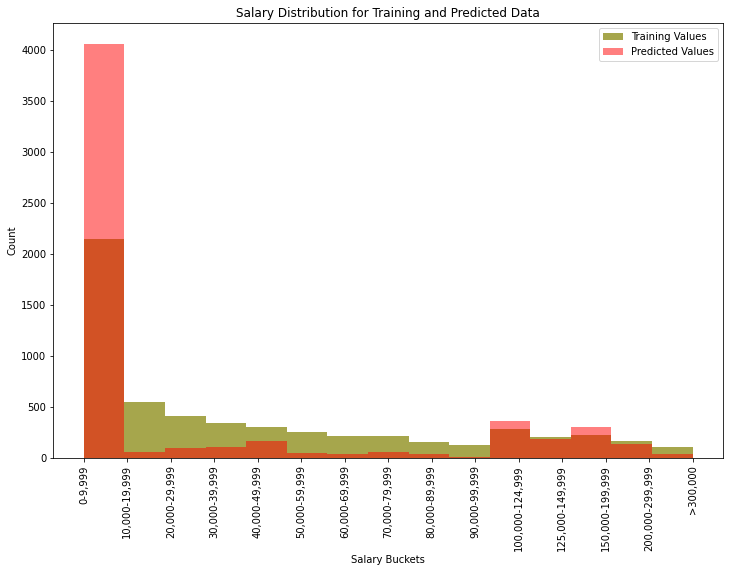

In [ ]:
#plot to see how the train and predicted values are distributed

fig, ax = plt.subplots(figsize=(12,8))
plt.hist(train_df['y_train'],bins =15,color='olive',alpha=0.7,label='Training Values')
plt.hist(train_df['y_pred'],bins =15,color='red',alpha=0.5,label='Predicted Values')
plt.xticks(rotation=90)
ax.set_xlabel('Salary Buckets')
ax.set_ylabel('Count')
plt.title("Salary Distribution for Training and Predicted Data")
plt.legend()
plt.show()

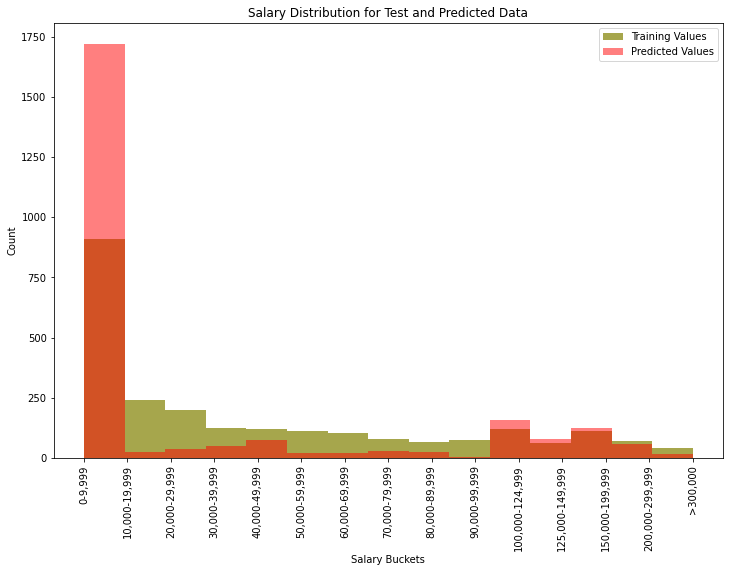

In [ ]:
#plot for seeing how the test and predicted values are distributed

fig, ax = plt.subplots(figsize=(12,8))
plt.hist(test_df['y_test'],bins =15,color='olive',alpha=0.7,label='Training Values')
plt.hist(test_df['y_pred'],bins =15,color='red',alpha=0.5,label='Predicted Values')
plt.xticks(rotation=90)
ax.set_xlabel('Salary Buckets')
ax.set_ylabel('Count')
plt.title("Salary Distribution for Test and Predicted Data")
plt.legend()
plt.show()

A mean F1 score is 0.331392. The accuracy is 0.377304. Overall, the model performed poorly. Both train and test evaluation metrics are low. 
This indicated an underfitting problem. The model tends to oversimplify and overgeneralize the data patterns which results in poor classification capabilities. This could also mean that the current features are not enough to predict the class well.

Also, several methods used in this analysis for feature removal, selection or engineering are not typically used with this type of dataset. This could have been the major reason for the model’s poor performance.

The distribution of predicted and true data was also plotted for both training and test sets. From the graphs, it is very clear that the predicted salary, in many cases is higher than the actual value.


To improve the performance:

More samples could be taken. This will reduce underfitting to an extent. More samples also mean more data to work with. In this case, there will be more flexibility for cleaning the data. 

Even more extensive hyperparameter tuning can be done. This will ensure better models are found.

Suitable methods must be used for cleaning or engineering the features.

Encoding should be done at a more granular level.